PyTorch GRU based stock prediction model. Inspired by this [medium article](https://towardsdatascience.com/lstm-time-series-forecasting-predicting-stock-prices-using-an-lstm-model-6223e9644a2f).

In [31]:
from google.colab import drive
drive.mount('/content/gdrive')

!ls "/content/gdrive/My Drive/GRU Stock Prediction/datasets"

PATH = '/content/gdrive/My Drive/GRU Stock Prediction/datasets/{symbol}'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
TSLA.csv


In [27]:
import os
import math
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

Data shape:(1306, 1)
                 TSLA
2015-07-10  51.830002
2015-07-13  52.431999
2015-07-14  53.130001
2015-07-15  52.627998
2015-07-16  53.335999


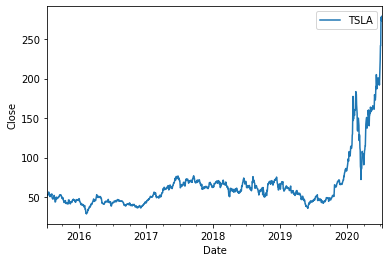

In [59]:
use_gpu = True
device = torch.device("cuda:0" if (torch.cuda.is_available() and use_gpu) else "cpu")

# Load and inspect data
def StockData(symbols, dates):
    df = pd.DataFrame(index=dates)
    for symbol in symbols:
        df_temp = pd.read_csv(PATH.format(symbol=symbol+'.csv'), index_col='Date', parse_dates=True, usecols=['Date', 'Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Close': symbol})
        df = df.join(df_temp)
    return df

symbols = ['TSLA']
dates = pd.date_range(start='2015-07-10',end='2020-07-10',freq='B')
df = StockData(symbols, dates)

print('Data shape:{}'.format(df.shape))
print(df.head(5))

df = df.fillna(method='ffill')
df.interpolate().plot()
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

Split into test and training sets. 

In [71]:
def StockLoader(df, symbol, length):
    '''
    convert df of symbol close prices to a tensor array with (n-length) sequences of `length`
    '''
    data = torch.tensor(df[symbol].values)
    seq = torch.zeros(len(data)-length, length) # empty tensor

    for i in range(len(data) - length):
        seq[i,:] = 


    # for i in range(len())
    
    # print(data[0:3])

# print(data.shape)
print(df.iloc[0:3].values)

StockLoader(df, 'TSLA', 1)

[[51.830002]
 [52.431999]
 [53.130001]]
tensor([51.8300, 52.4320, 53.1300], dtype=torch.float64)
